# 1. Installing Packages

In [54]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

# 2. Importing Dataset

In [55]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',skiprows=[0],skipinitialspace=True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Attribute Information :-

Period Covered

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

    Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
    RH : Relative Humidity in %: 21 to 90
    Ws :Wind speed in km/h: 6 to 29
    Rain: total day in mm: 0 to 16.8
    FWI Components

    Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
    Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
    Drought Code (DC) index from the FWI system: 7 to 220.4
    Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
    Buildup Index (BUI) index from the FWI system: 1.1 to 68
    Fire Weather Index (FWI) Index: 0 to 31.1
    Classes: two classes, namely Fire and not Fire

In [56]:
df_copy = df

# Preparing dataset

In [57]:
df_copy.shape

(246, 14)

In [58]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Features
    day---> Numerical(Descrete)
    month---> Numberical(Descrete)
    year---> Numberical(Descrete)
    Temp---> Numberical(Descrete)
    RH---> Numberical(Descrete)
    WS---> Numberical(Descrete)
    Rain---> Numberical(continous)
    DMC---> Numberical(continous)
    ISI---> Numberical(continous)
    DC---> Numberical(continous)
    FWI---> Numberical(continous)
    ISI---> Numberical(continous)
    BUI---> Numerical(Contionus)
    
    Classes---> Catagorical                        
#### Catagorical are of two types 
    Ordinal 
    Nominal 
#### Numerical are of two types
    Discrete (1,2,3,4,5..)
    Continous (1.1,1.2,1.3....)

In [59]:
df_copy.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


#### Changing datatype
    Before changing data type of any columns make sure to remove null values

In [60]:
# Changing data type of Temperature
df_copy["Temperature"]

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 246, dtype: object

In [61]:
df_copy[df_copy["Temperature"].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_copy = df_copy.dropna(subset=["Temperature"])

In [63]:
df_copy['Temperature'].isnull().sum()

0

In [64]:
df_copy['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', 'Temperature', '38', '39', '40', '42'],
      dtype=object)

In [65]:
df_copy['Temperature'].loc[df_copy['Temperature'] == 'Temperature']

123    Temperature
Name: Temperature, dtype: object

In [66]:
a = df_copy[df_copy['Temperature'] == 'Temperature'].index[0]
df_copy = df_copy.drop(df_copy.index[a-1],axis=0)
df_copy['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

#### Removing unnecessary space in column headers using str.strip()

In [67]:
df_copy.columns = df_copy.columns.str.strip()
df_copy.keys()

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

#### Removing unnecessary spaces in class attriute

In [68]:
df_copy['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [69]:
df_copy.dropna(subset=['Classes'],inplace=True)
df_copy['Classes'] = df_copy['Classes'].str.strip()
df_copy['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

#### Converting the necessary column dataye to int

In [70]:
df_copy.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [71]:
float_column_dic = {'ISI': float,'Ws':float,'FFMC':float,'DMC':float,'DC':float,'BUI':float,'FWI':float,'Rain':float}
int_column_dic = {'Temperature':int,'RH':int}
df_copy = df_copy.astype(float_column_dic)
df_copy = df_copy.astype(int_column_dic)
df_copy.dtypes

day             object
month           object
year            object
Temperature      int32
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

#### DataFrame Description

In [72]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4
ISI,243.0,4.742387,4.154234,0.0,1.40,3.5,7.25,19.0
BUI,243.0,16.690535,14.228421,1.1,6.00,12.4,22.65,68.0
FWI,243.0,7.035391,7.440568,0.0,0.70,4.2,11.45,31.1


#### Checking null values

In [73]:
df_copy.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

# 3. Exploratory Data Analysis
We will try out the following analysis on our dataset

    Univariate
    Bivariate
    Multivariate

#### Encoding 'not fire' as 0 and Fire as 1

In [74]:
df_copy['Classes'] = np.where(df_copy['Classes']=='not fire',0,1)

In [75]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


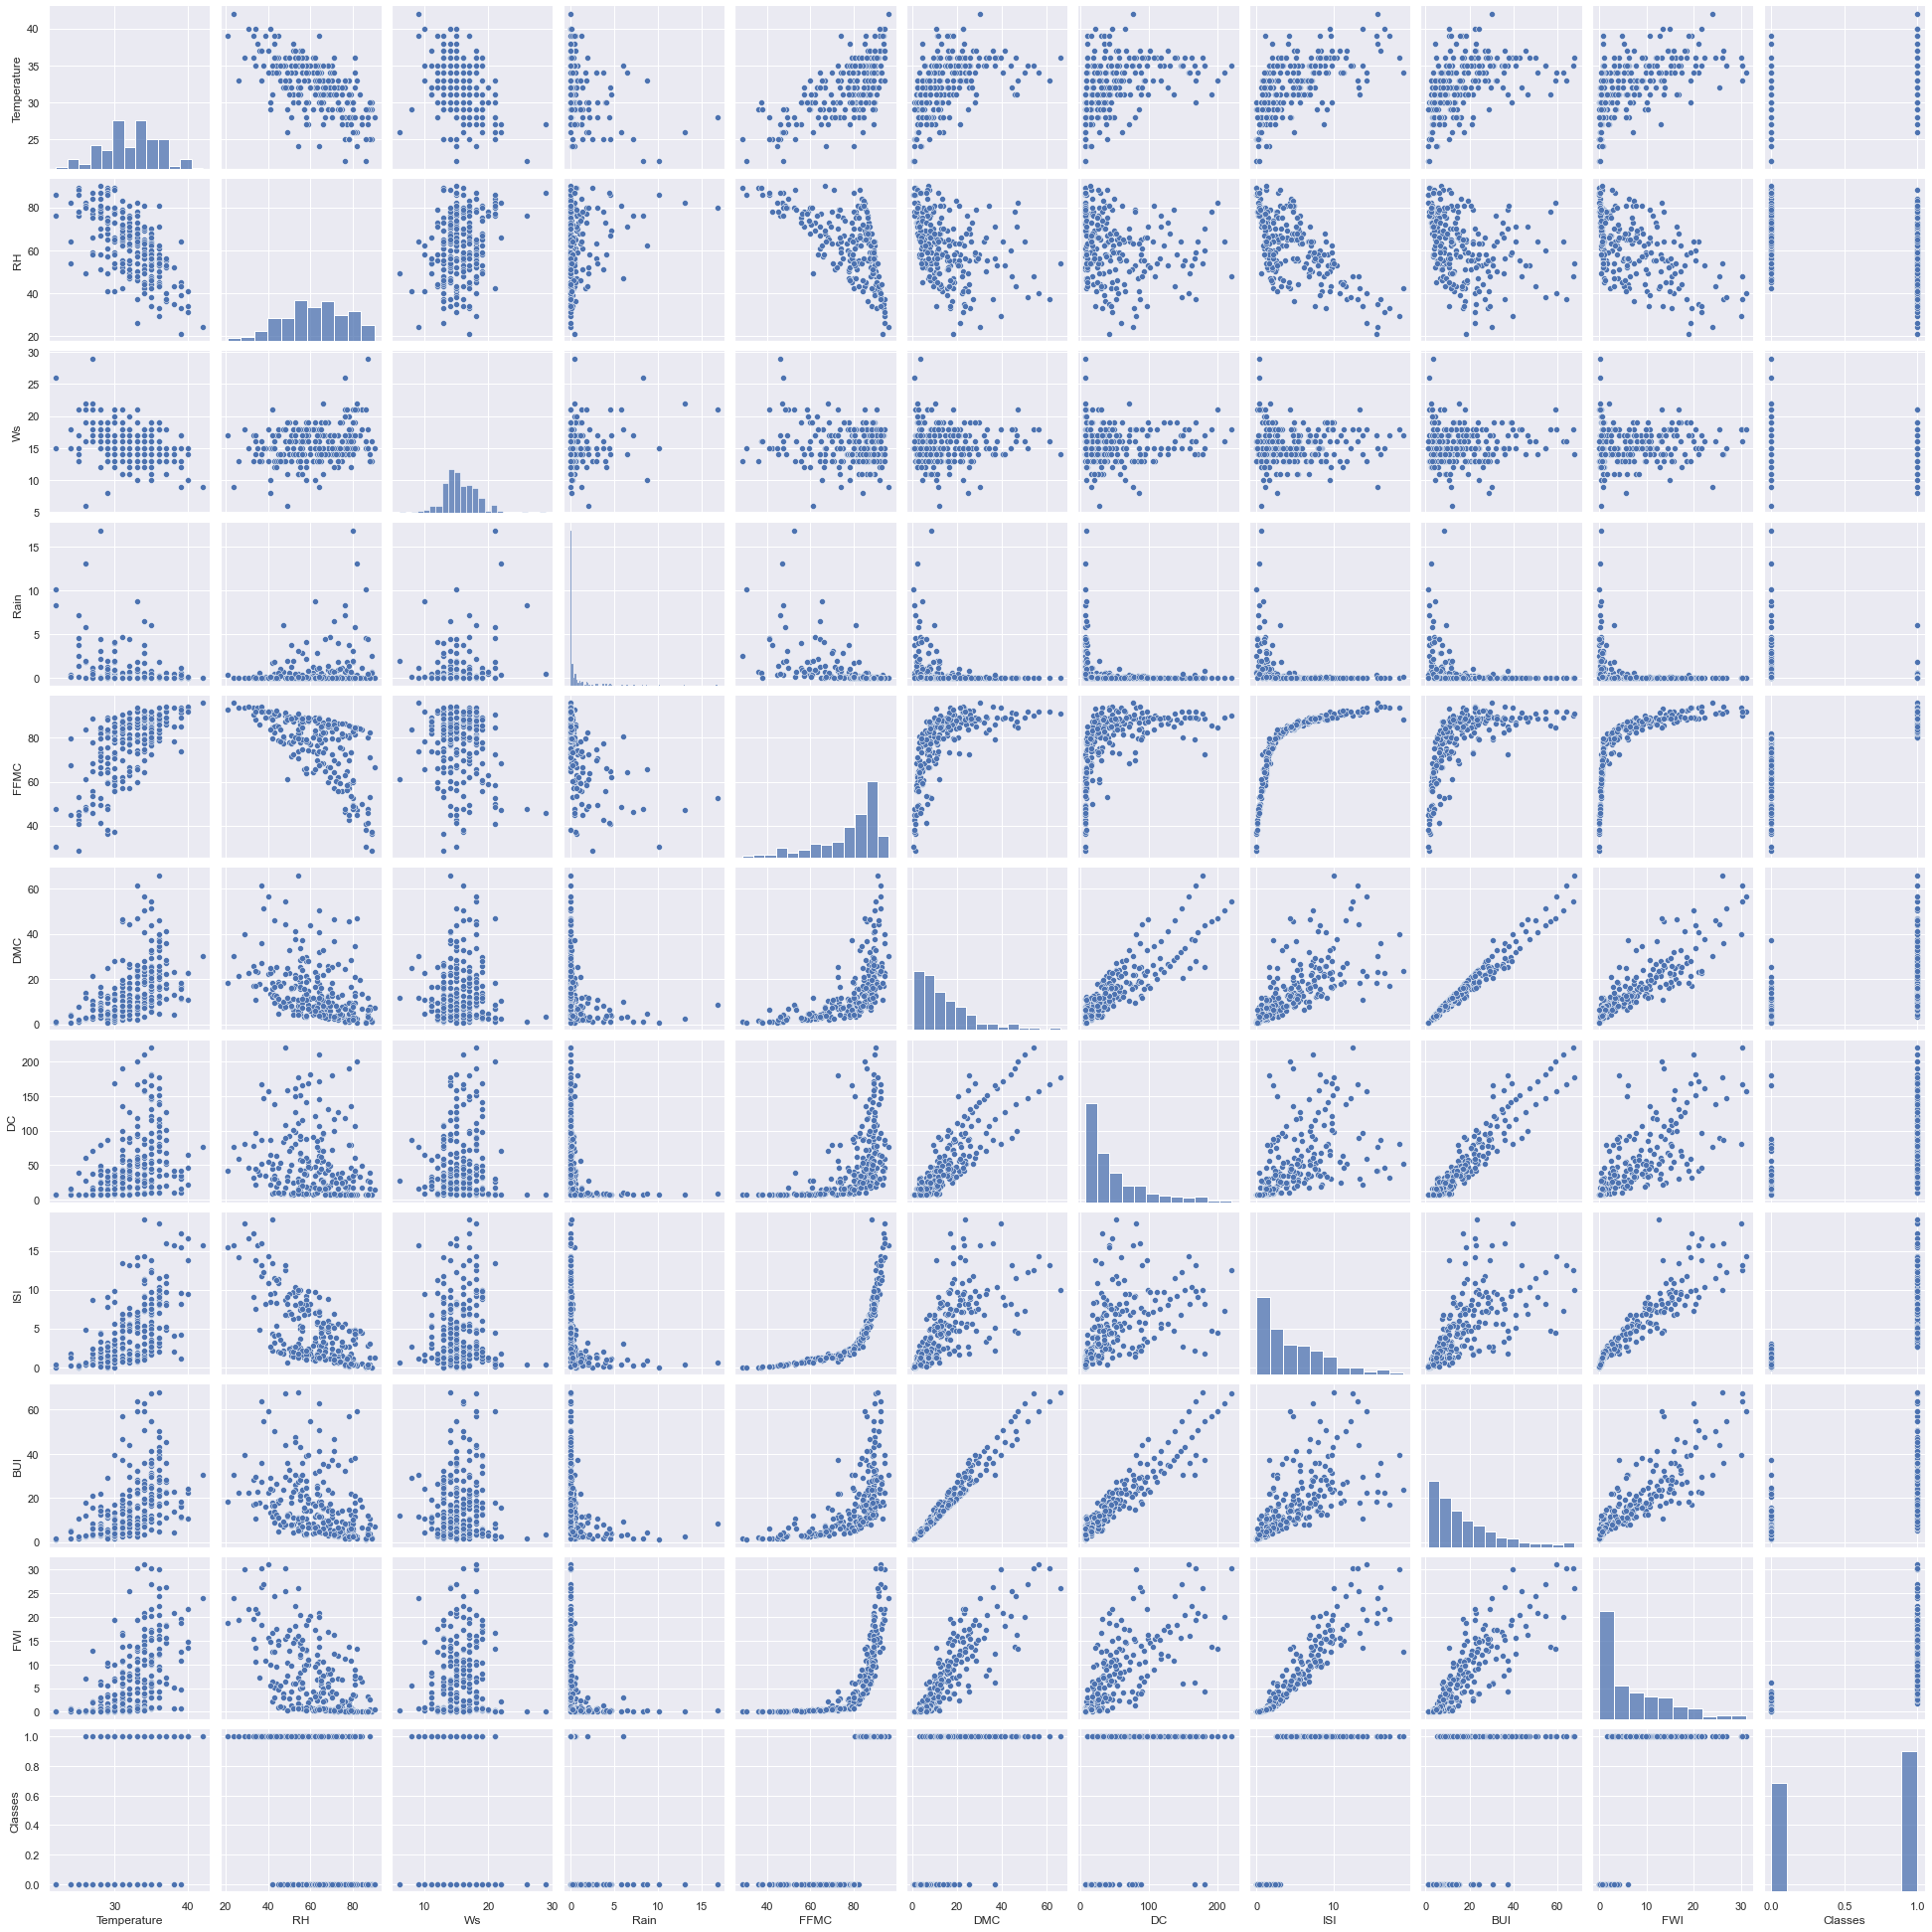

In [76]:
sns.pairplot(df_copy)

<AxesSubplot:>

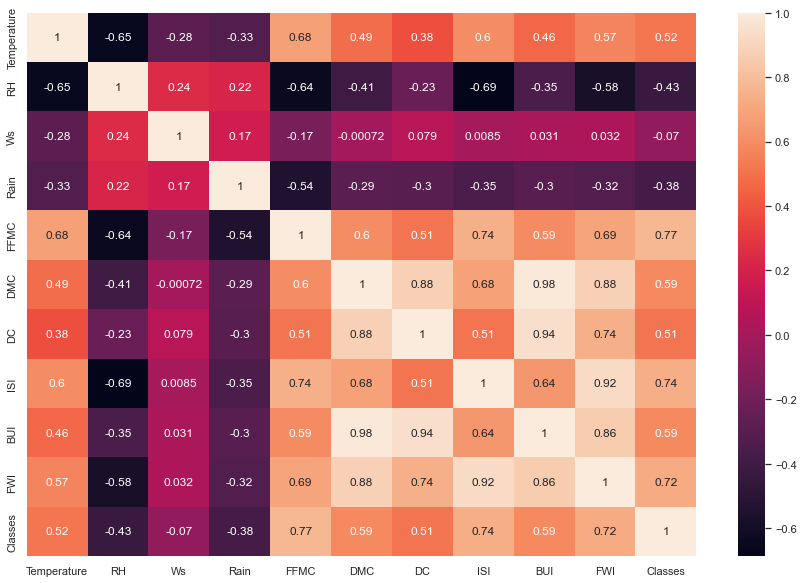

In [77]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df_copy.corr(),annot=True)

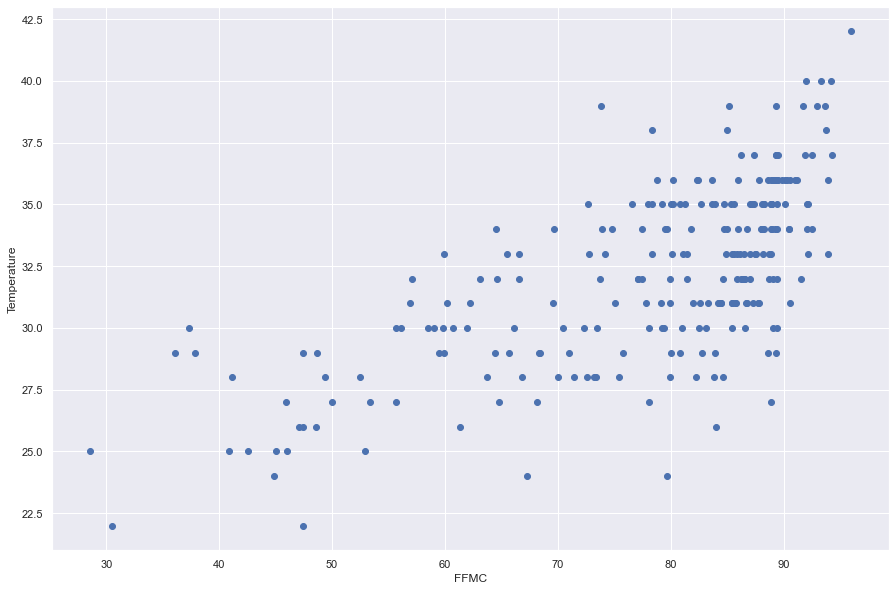

In [78]:
plt.scatter(df_copy['FFMC'],df_copy['Temperature'])
plt.xlabel("FFMC")
plt.ylabel("Temperature")
plt.show()

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

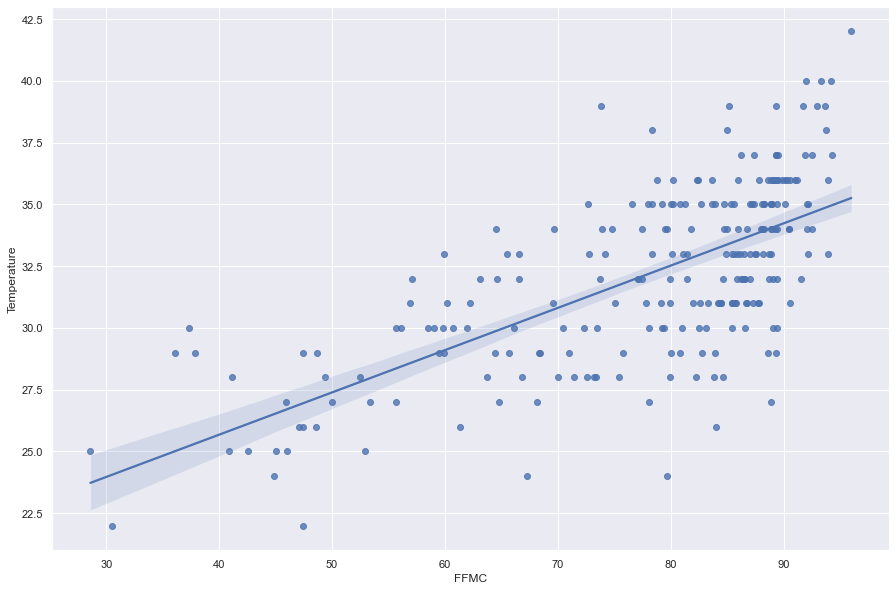

In [79]:
sns.regplot(x = df_copy['FFMC'], y = df_copy['Temperature'])

In [80]:
corr_list = ['FFMC', 'ISI', 'FWI','BUI']

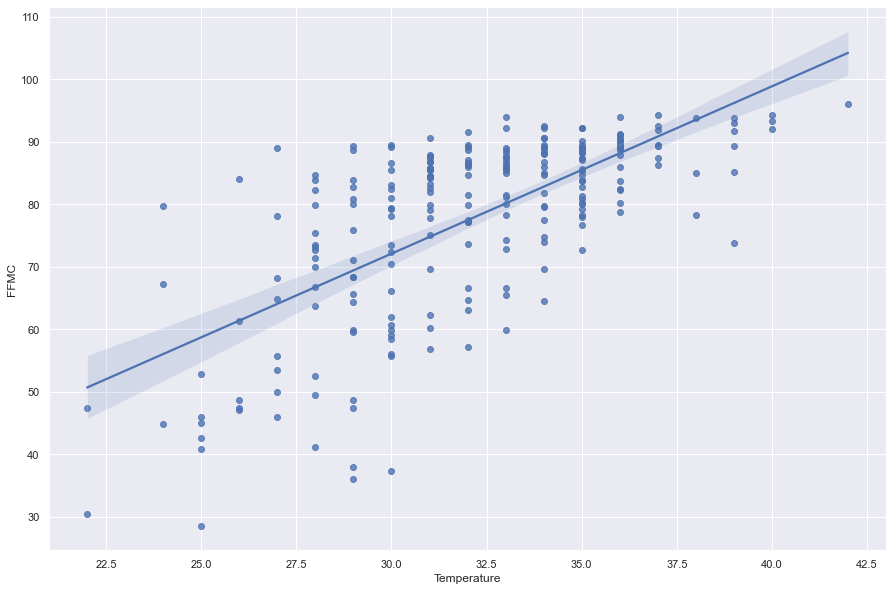

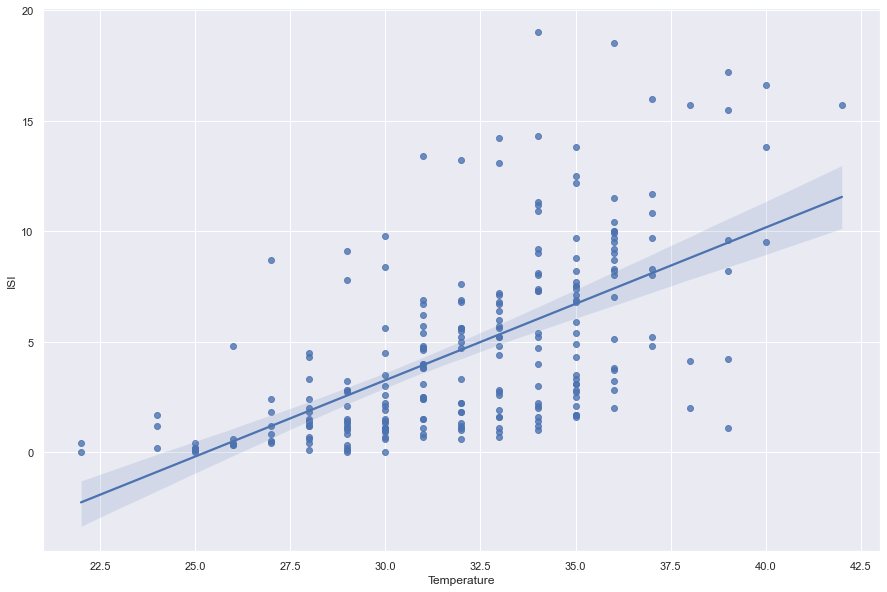

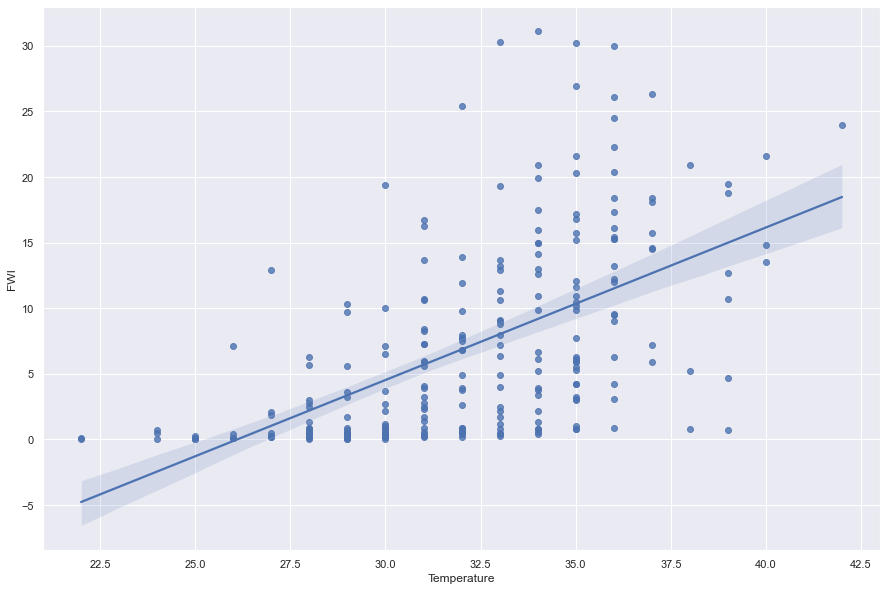

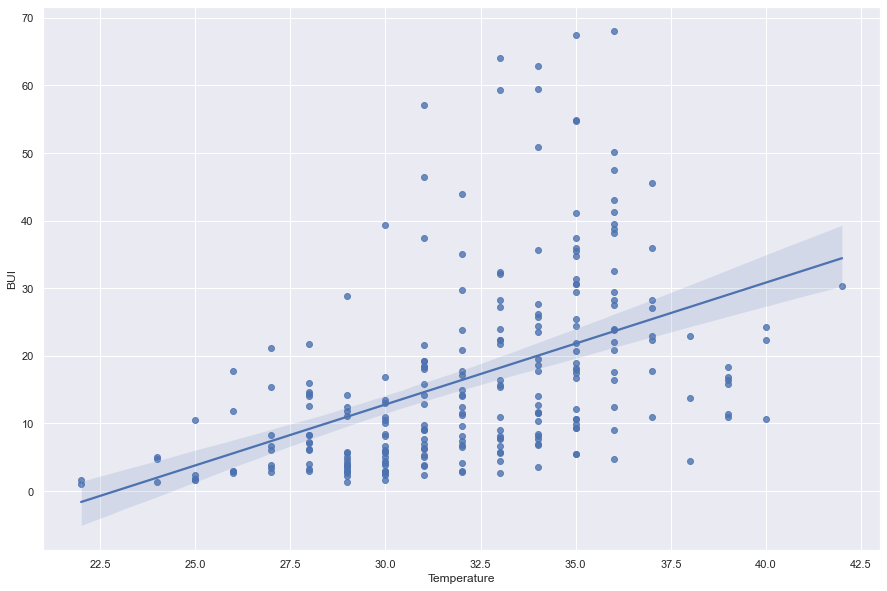

In [81]:
for i in corr_list:
    sns.regplot(x = 'Temperature', y = i, data = df_copy)
    plt.show()

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'Ws'}>],
       [<AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>],
       [<AxesSubplot:title={'center':'FWI'}>,
        <AxesSubplot:title={'center':'Classes'}>, <AxesSubplot:>]],
      dtype=object)

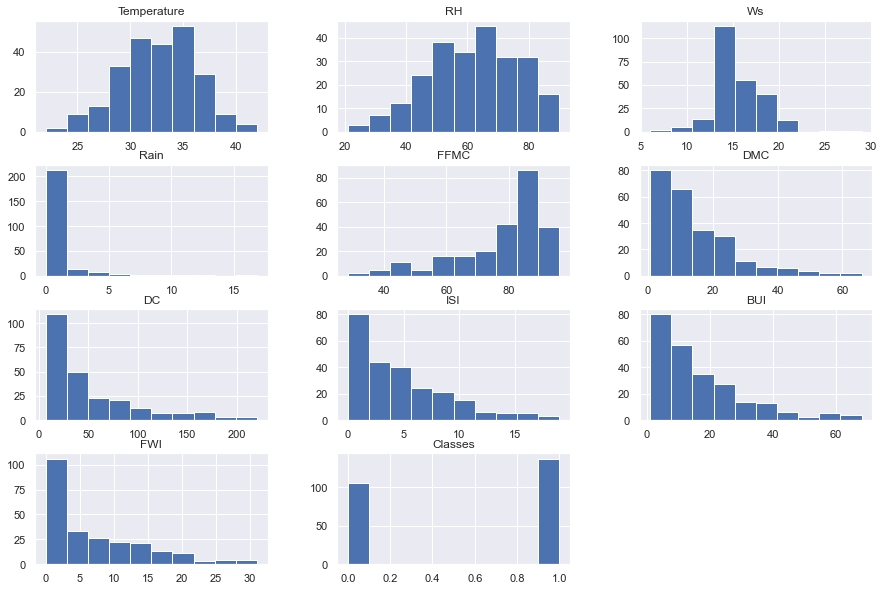

In [82]:
df_copy.hist()


In [83]:
percentage = df_copy.Classes.value_counts(normalize=True)*100
percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

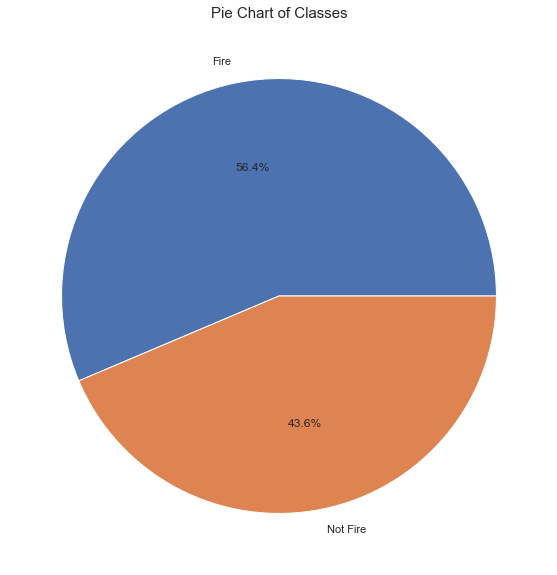

In [84]:
c_labels = ['Fire','Not Fire']
plt.figure(figsize=(15,10))
plt.pie(percentage,labels = c_labels,autopct="%1.1f%%")
plt.title("Pie Chart of Classes",fontsize=15)
plt.show()

<AxesSubplot:xlabel='Temperature'>

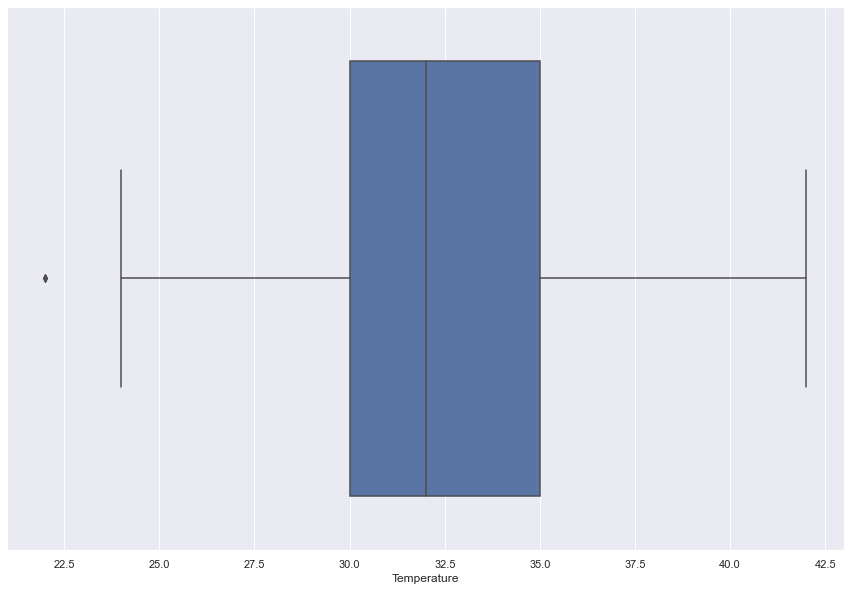

In [85]:
sns.boxplot(df_copy['Temperature'])

There are few outliars in range 22.5

<AxesSubplot:xlabel='FWI'>

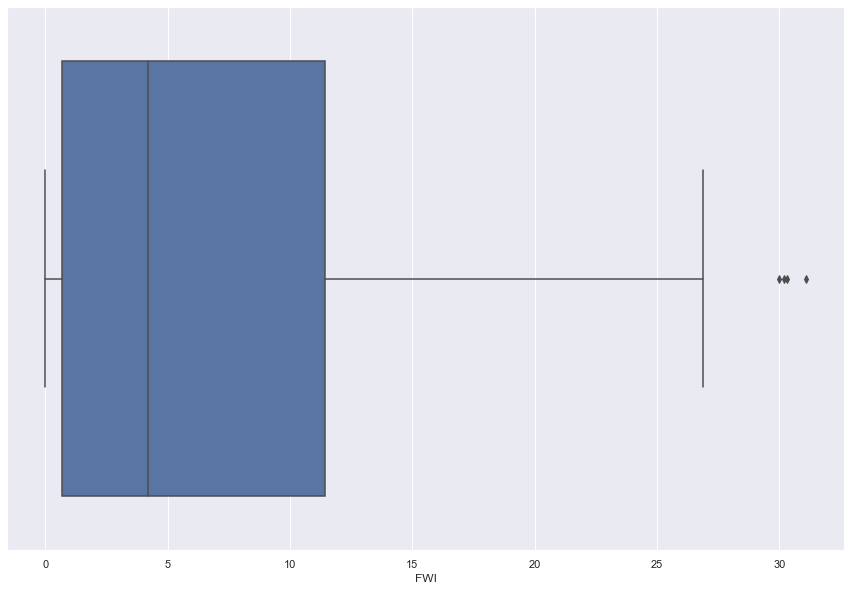

In [86]:
sns.boxplot(df_copy['FWI'])

# 4. Building Model

In [87]:
df_copy

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,02,06,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,03,06,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,04,06,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,05,06,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
242,27,09,2012,28,87,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
243,28,09,2012,27,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
244,29,09,2012,24,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


We will predict Temperature from the data frame

In [88]:
X = df_copy.drop('Temperature', axis=1)

In [89]:
Y = df_copy['Temperature']

In [90]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=10)

#### Standardscaler (Standardization)

In [91]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [92]:
X_test_scaled = scaler.transform(X_test)

    Why we use fit_transform on training data but transform on test data?
       Formula to perform standardization
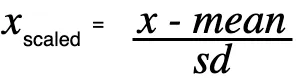

The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

### Modeltraining

#### Terminologies used in Regression Analysis
#### Outliers 
Suppose there is an observation in the dataset that has a very high or very low value as compared to the other observations in the data, i.e. it does not belong to the population, such an observation is called an outlier. In simple words, it is an extreme value. An outlier is a problem because many times it hampers the results we get.

#### Multicollinearity
When the independent variables are highly correlated to each other, then the variables are said to be multicollinear. Many types of regression techniques assume multicollinearity should not be present in the dataset. It is because it causes problems in ranking variables based on its importance, or it makes the job difficult in selecting the most important independent variable.

#### Heteroscedasticity
When the variation between the target variable and the independent variable is not constant, it is called heteroscedasticity. Example-As one’s income increases, the variability of food consumption will increase. A poorer person will spend a rather constant amount by always eating inexpensive food; a wealthier person may occasionally buy inexpensive food and at other times, eat expensive meals. Those with higher incomes display a greater variability of food consumption.

#### Underfit and Overfit
When we use unnecessary explanatory variables, it might lead to overfitting. Overfitting means that our algorithm works well on the training set but is unable to perform better on the test sets. It is also known as a problem of high variance.

When our algorithm works so poorly that it is unable to fit even a training set well, then it is said to underfit the data. It is also known as a problem of high bias.

In [93]:
regression = LinearRegression()

In [94]:
regression.fit(X_train_scaled,Y_train)

LinearRegression()

In [97]:
#print the coefficients & intercept
print(regression.coef_)

[-3.55655981e-01 -2.15366021e-01  2.88657986e-15 -1.55533737e+00
 -7.11397990e-01 -2.32589387e-01  8.39039345e-01  5.80589708e-01
  6.09009468e-01  1.21057695e-01 -2.22002529e-01 -4.51849613e-01
  2.28828736e-01]


In [98]:
regression.score(X_test_scaled,Y_test)

0.44195259337534076

In [99]:
# Intercept 
regression.intercept_

32.074074074074076

In [102]:
# Predicting
reg_pred = regression.predict(X_test_scaled)
reg_pred

array([32.21923952, 32.99638684, 33.28129371, 24.98699719, 28.91070294,
       33.65759579, 31.80507484, 34.62500857, 31.63513435, 32.6606703 ,
       33.40682535, 33.58666966, 35.75616549, 32.05734411, 33.84131102,
       33.46034026, 26.71567099, 35.90681896, 33.50415199, 23.93886626,
       32.43984698, 32.45100408, 33.11532989, 32.69375931, 30.00015909,
       32.62648867, 33.17803493, 31.92655815, 32.21305185, 34.04436928,
       34.88720513, 33.74423043, 34.53748824, 32.92653056, 31.29022149,
       28.78506664, 32.44523481, 31.4764023 , 33.10480663, 34.28908215,
       33.8284458 , 35.55661506, 34.52299502, 37.36950901, 33.1206731 ,
       36.55717401, 32.11513883, 35.46998064, 30.28453626, 31.25074301,
       32.61708601, 39.16311622, 32.96741556, 34.96411071, 27.33081204,
       36.90695658, 33.77330539, 33.43024933, 28.65896864, 32.63474549,
       32.56957449, 32.2159893 , 24.99104357, 36.33485553, 36.20887889,
       29.02836497, 29.47037952, 29.12850575, 35.94106011, 28.56

Text(0, 0.5, 'Test Predicted Data')

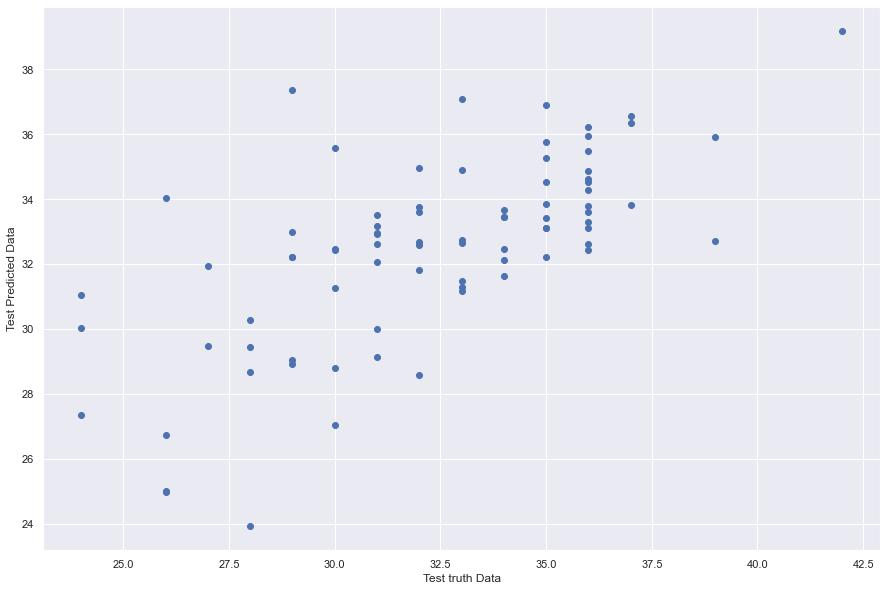

In [104]:
plt.scatter(Y_test,reg_pred)
plt.xlabel("Test truth Data")
plt.ylabel("Test Predicted Data")

<AxesSubplot:xlabel='Temperature'>

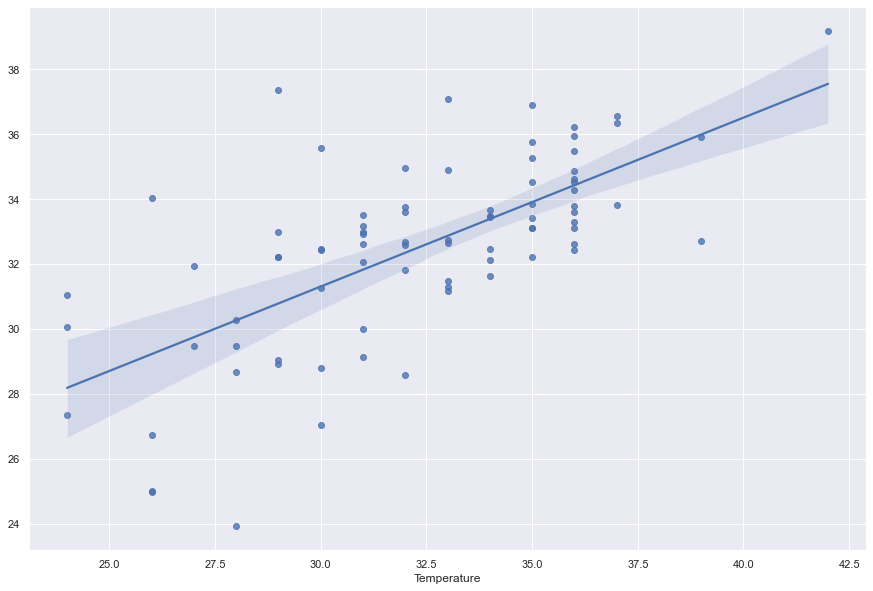

In [105]:
sns.regplot(x = Y_test,y = reg_pred)

#### Errors

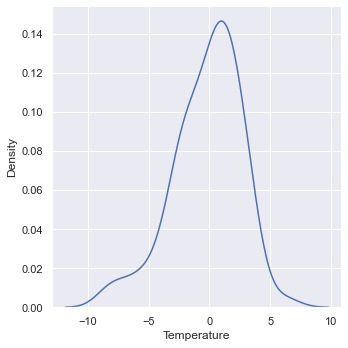

In [106]:
sns.displot((Y_test-reg_pred),kind='kde')

#### Performance Metrices

In [107]:
print(mean_squared_error(Y_test,reg_pred))
print(mean_absolute_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

7.725056799158367
2.1589850779449145
2.7793986398425052


#### R SQUARE & ADJUSTED R SQUARE


In [108]:
score = r2_score(Y_test,reg_pred)
score

0.44195259337534076

In [109]:
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test_scaled.shape[1]-1)

0.33367473835861583

# 5. Ridge Regression
To reduce overfitting

In [110]:
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)

Ridge()

In [111]:
print(ridge.coef_)

[-0.35008173 -0.21181812  0.         -1.53819614 -0.71265696 -0.23350374
  0.84536138  0.40416058  0.50481707  0.09437243  0.01708413 -0.3876381
  0.2163208 ]


In [112]:
ridge.intercept_

32.074074074074076

In [113]:
ridge_pred = ridge.predict(X_test_scaled)

In [114]:
ridge_pred

array([32.21436974, 32.9861369 , 33.27812367, 25.01070379, 28.92073777,
       33.65210627, 31.79962865, 34.62588908, 31.6417076 , 32.66601215,
       33.40992394, 33.57708344, 35.72068846, 32.07158041, 33.76519727,
       33.47407992, 26.7469569 , 35.89899892, 33.49065301, 23.96263229,
       32.38675213, 32.44999978, 33.13774821, 32.70857906, 29.9961427 ,
       32.62927816, 33.18597201, 31.91957016, 32.21259073, 34.02301465,
       34.86579417, 33.72390354, 34.50728858, 32.93252637, 31.29191822,
       28.79211991, 32.43736211, 31.48149335, 33.11257047, 34.26609845,
       33.82479559, 35.53887239, 34.52389979, 37.32602605, 33.12103297,
       36.56119258, 32.10940303, 35.48147319, 30.28868082, 31.25010911,
       32.617657  , 39.14754933, 32.94855489, 34.95973259, 27.3583184 ,
       36.9092371 , 33.77672649, 33.42592626, 28.68258645, 32.61986763,
       32.58689003, 32.20347509, 24.99129324, 36.34905394, 36.18168659,
       29.06487941, 29.45196475, 29.12993351, 35.9489887 , 28.57

# 6. Lasso

# 7. ElasticNet